In [1]:
# Install necessary packages (if not already installed)
!pip install pandas numpy matplotlib seaborn scikit-learn

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


You should consider upgrading via the 'D:\Dynamic & Demand\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:

# Load the dataset into a DataFrame
data = pd.read_csv('Walmart (3).csv')  # Replace 'your_file.csv' with the uploaded filename
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Check basic structure of the data
print(data.info())  # Check the columns, data types, and non-null counts

# Summary statistics for numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check data types for each column
print(data.dtypes)

# Check for categorical vs numerical columns
categorical_columns = data.select_dtypes(include='object').columns
print(f"Categorical columns: {categorical_columns}")

numerical_columns = data.select_dtypes(include='number').columns
print(f"Numerical columns: {numerical_columns}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000

In [4]:
# Convert the 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Check the conversion
print(data['Date'].head())


0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]


In [5]:
# Check if there are any missing values in the dataset (again)
print(data.isnull().sum())


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [6]:
# Check for any temperature lower than a reasonable threshold (like -50 degrees)
print(data[data['Temperature'] < -50])

# Check for any unrealistic sales values (e.g., negative sales)
print(data[data['Weekly_Sales'] < 0])


Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []


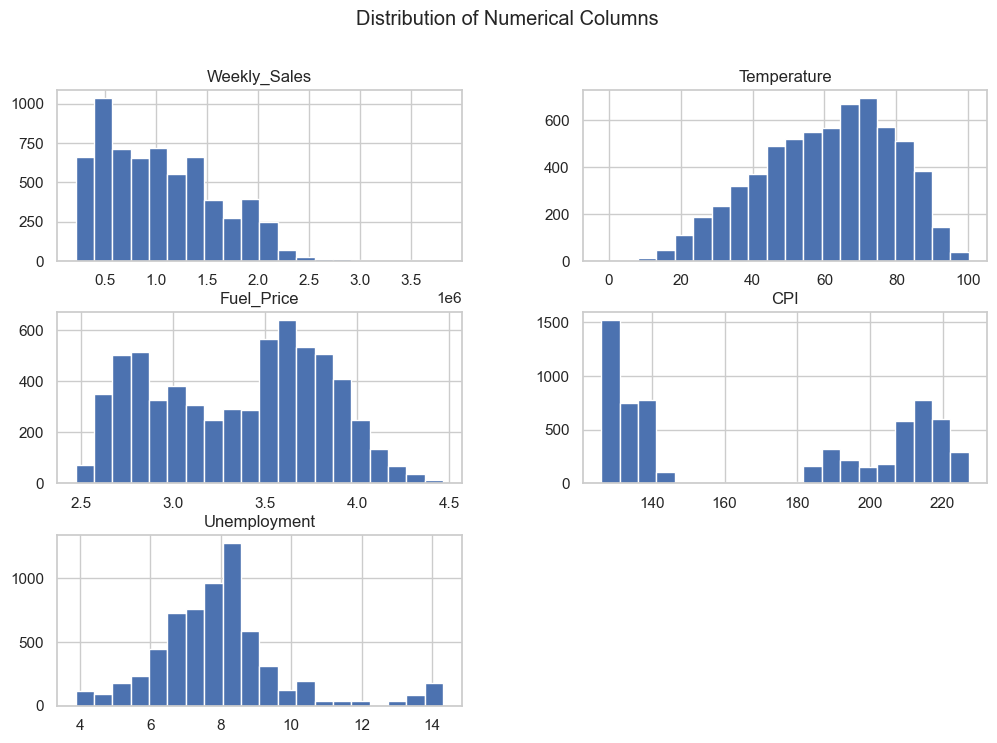

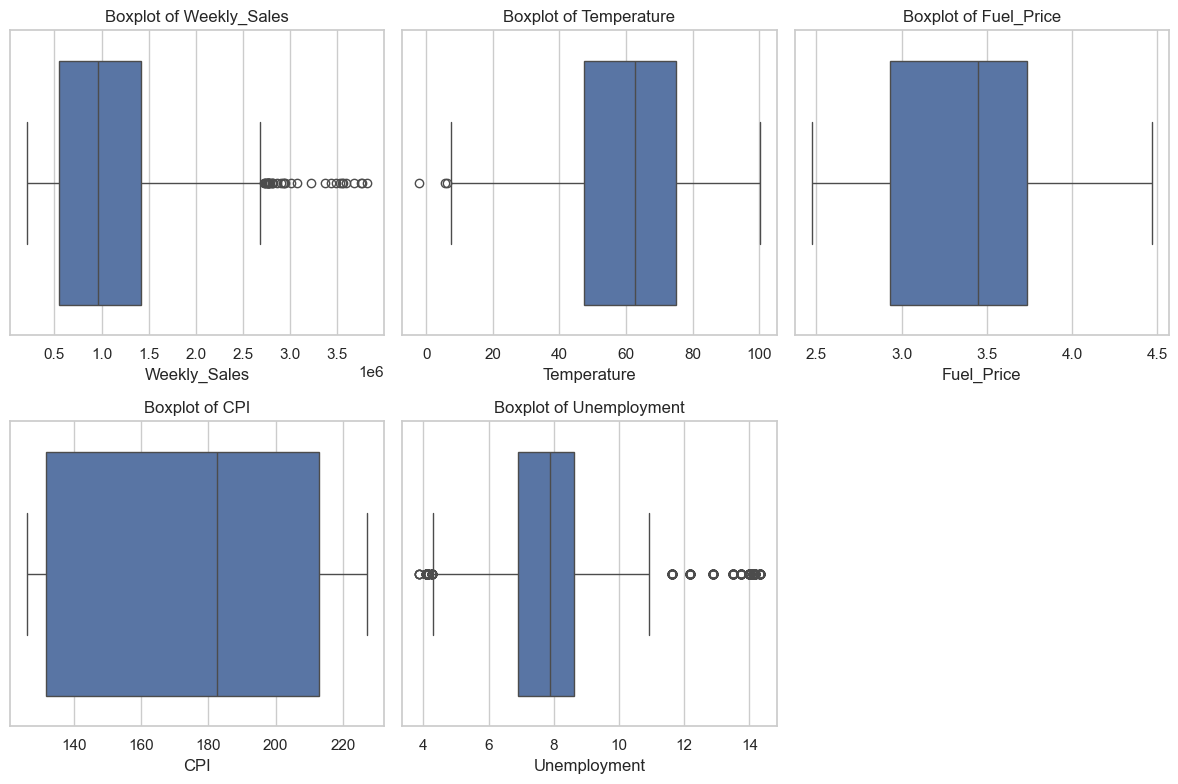

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Plot histograms for numerical columns
numerical_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
data[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Columns')
plt.show()

# Box plots for numerical columns to see outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


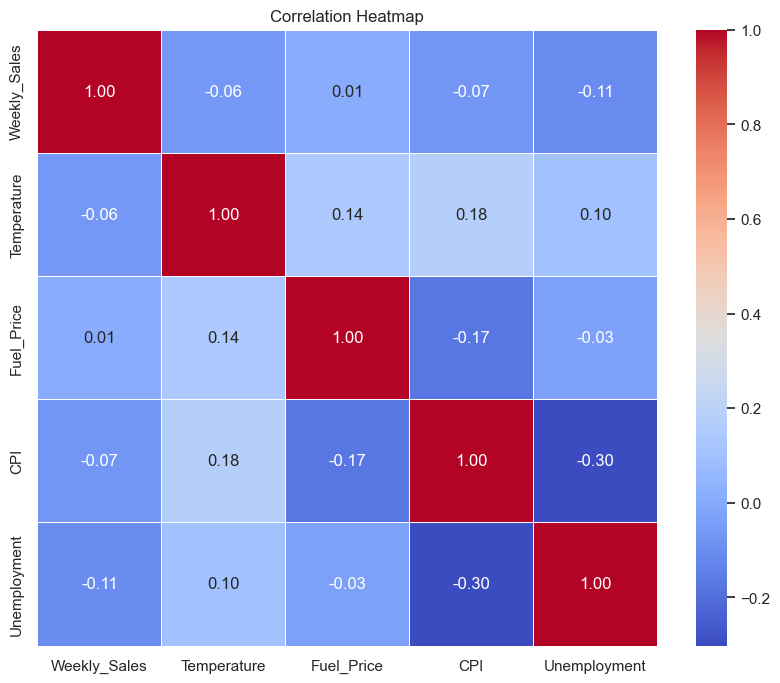

In [8]:
# Calculate correlations between numerical features
correlation_matrix = data[numerical_columns].corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


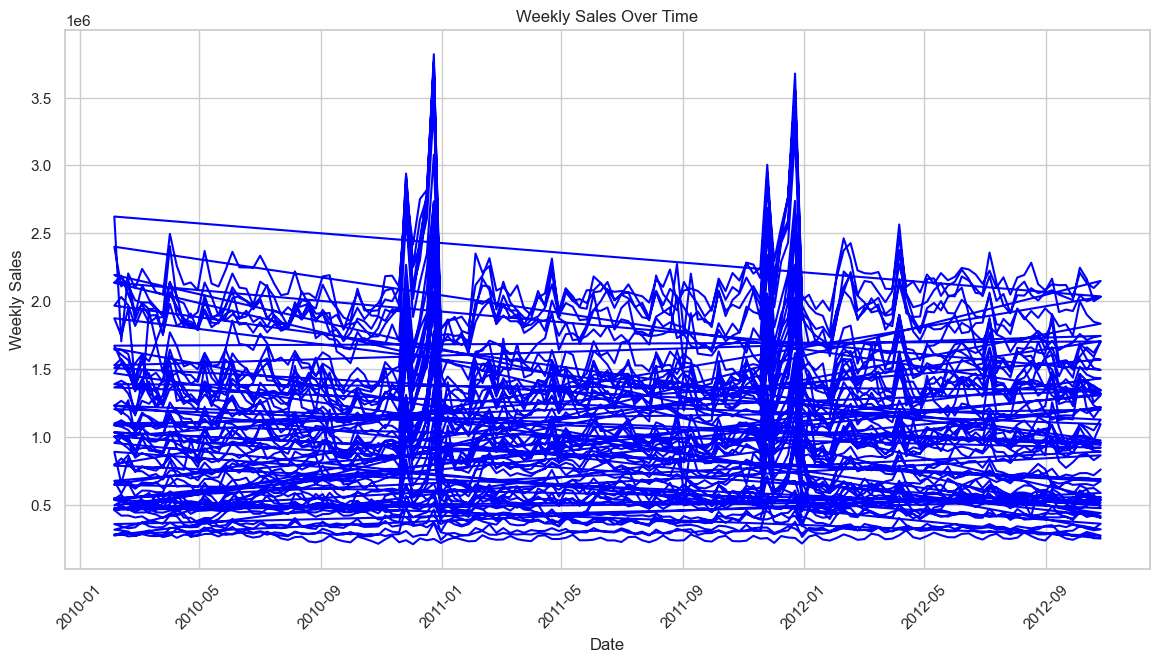

In [9]:
# Plot Weekly_Sales over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Weekly_Sales'], color='blue')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Calculate the IQR for each numerical feature
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers for each column
outliers = (data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)

# Check how many outliers exist in the dataset
outliers_count = outliers.sum()
print(outliers_count)


Weekly_Sales     34
Temperature       3
Fuel_Price        0
CPI               0
Unemployment    481
dtype: int64


In [11]:
# Capping/Flooring the outliers for Weekly_Sales, Temperature, and Unemployment

# Define upper and lower bounds
lower_bound_weekly_sales = lower_bound['Weekly_Sales']
upper_bound_weekly_sales = upper_bound['Weekly_Sales']

lower_bound_temperature = lower_bound['Temperature']
upper_bound_temperature = upper_bound['Temperature']

lower_bound_unemployment = lower_bound['Unemployment']
upper_bound_unemployment = upper_bound['Unemployment']

# Apply capping/flooring
data['Weekly_Sales'] = data['Weekly_Sales'].clip(lower=lower_bound_weekly_sales, upper=upper_bound_weekly_sales)
data['Temperature'] = data['Temperature'].clip(lower=lower_bound_temperature, upper=upper_bound_temperature)
data['Unemployment'] = data['Unemployment'].clip(lower=lower_bound_unemployment, upper=upper_bound_unemployment)

# Check if the outliers were capped/floored
outliers_after_handling = (data[numerical_columns] < lower_bound) | (data[numerical_columns] > upper_bound)
outliers_after_handling_count = outliers_after_handling.sum()
print(outliers_after_handling_count)


Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [12]:
# Extract useful date features from 'Date'
data['Date'] = pd.to_datetime(data['Date'])

# Extract day, month, year, quarter, and weekday features
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter
data['Weekday'] = data['Date'].dt.weekday

# Create a new feature to indicate if it's a weekend
data['Is_Weekend'] = data['Weekday'].isin([5, 6]).astype(int)


In [13]:
# Create lag features for 'Weekly_Sales'
data['Weekly_Sales_Lag1'] = data['Weekly_Sales'].shift(1)
data['Weekly_Sales_Lag2'] = data['Weekly_Sales'].shift(2)
data['Weekly_Sales_Lag3'] = data['Weekly_Sales'].shift(3)

# Drop missing values generated due to the shift
data = data.dropna()


In [14]:
# Create interaction features
data['Temp_Fuel_Price_Interaction'] = data['Temperature'] * data['Fuel_Price']
data['Holiday_Temperature_Interaction'] = data['Holiday_Flag'] * data['Temperature']


In [15]:
# One-Hot Encoding for 'Store' if it's a categorical variable
data = pd.get_dummies(data, columns=['Store'], drop_first=True)


In [16]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales_Lag1', 'Weekly_Sales_Lag2', 'Weekly_Sales_Lag3']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [17]:
!pip install statsmodels


You should consider upgrading via the 'D:\Dynamic & Demand\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


d:\Dynamic & Demand\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
d:\Dynamic & Demand\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
d:\Dynamic & Demand\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


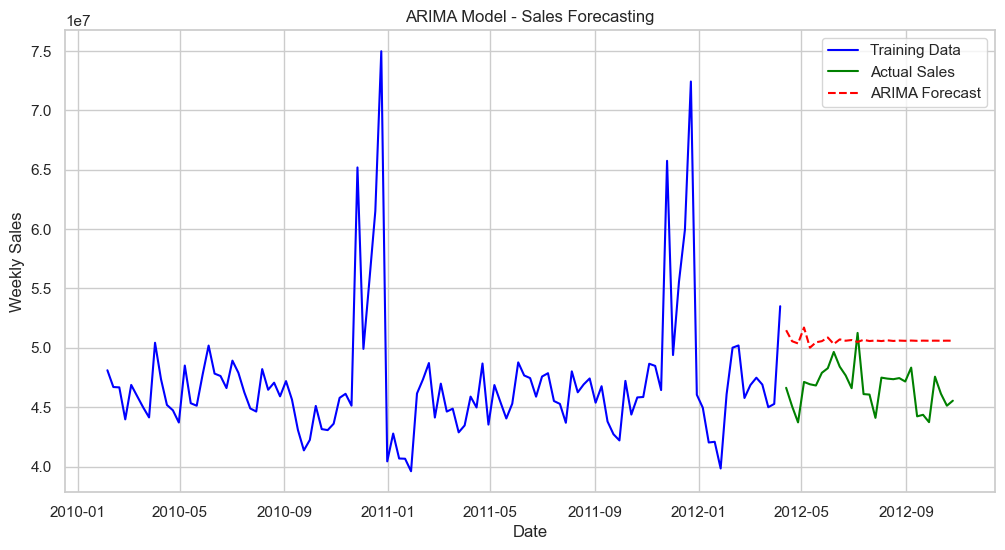

Mean Absolute Error (MAE): 3990558.0784236686


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Ensure 'Date' is the index for time-series analysis
data.set_index('Date', inplace=True)

# Sort data by date
data = data.sort_index()

# Aggregate sales at a store level (if necessary)
sales_data = data.groupby('Date')['Weekly_Sales'].sum()

# Train-test split (80% training, 20% testing)
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train, order=(5,1,0))  # (p=5, d=1, q=0) - Adjust as needed
arima_result = arima_model.fit()

# Forecast on test data
forecast = arima_result.forecast(steps=len(test))

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Sales', color='green')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('ARIMA Model - Sales Forecasting')
plt.legend()
plt.show()

# Model Evaluation (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error (MAE): {mae}")


d:\Dynamic & Demand\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
d:\Dynamic & Demand\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
d:\Dynamic & Demand\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


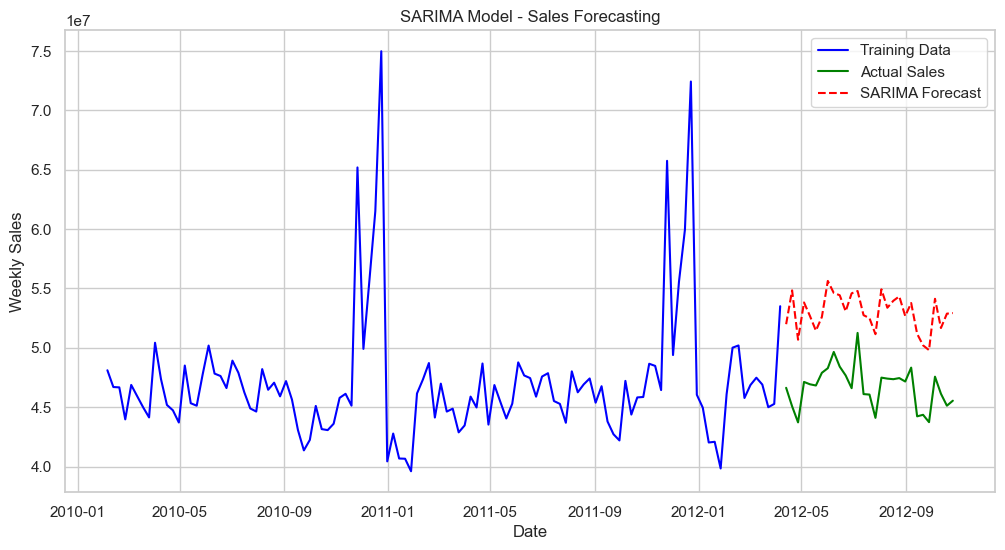

Mean Absolute Error (MAE) for SARIMA: 6317638.663890711


In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(5,1,0), seasonal_order=(1,1,1,52))  # 52 weeks seasonality
sarima_result = sarima_model.fit()

# Forecast
sarima_forecast = sarima_result.forecast(steps=len(test))

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Sales', color='green')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('SARIMA Model - Sales Forecasting')
plt.legend()
plt.show()

# Model Evaluation
mae_sarima = mean_absolute_error(test, sarima_forecast)
print(f"Mean Absolute Error (MAE) for SARIMA: {mae_sarima}")


In [20]:
!pip install prophet


You should consider upgrading via the 'D:\Dynamic & Demand\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Importing plotly failed. Interactive plots will not work.
18:26:06 - cmdstanpy - INFO - Chain [1] start processing
18:26:09 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\surya\AppData\Local\Temp\ipykernel_6700\3358592409.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future['Fuel_Price'].fillna(method='ffill', inplace=True)
C:\Users\surya\AppData\Local\Temp\ipykernel_6700\3358592409.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill()

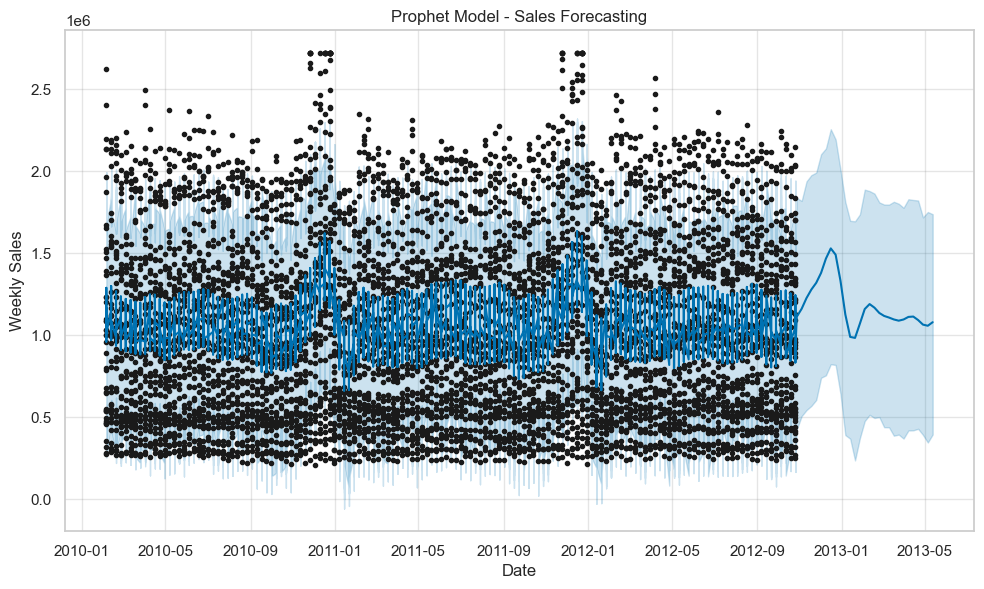

Mean Absolute Error (MAE) for Prophet: 45517567.74377649


In [21]:
from prophet import Prophet

# Prepare Data for Prophet
# Reset the index to bring 'Date' back as a column
df_prophet = data.reset_index()[['Date', 'Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Initialize Prophet Model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Add external regressors
prophet_model.add_regressor('Fuel_Price')
prophet_model.add_regressor('CPI')
prophet_model.add_regressor('Unemployment')

# Fit the model
prophet_model.fit(df_prophet)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=len(test), freq='W')

# Align external regressors with the future dataframe
# Merge the future dataframe with the original data to get the regressors
future = pd.merge(future, data.reset_index()[['Date', 'Fuel_Price', 'CPI', 'Unemployment']], left_on='ds', right_on='Date', how='left')

# Fill NaN values with forward fill
future['Fuel_Price'].fillna(method='ffill', inplace=True)
future['CPI'].fillna(method='ffill', inplace=True)
future['Unemployment'].fillna(method='ffill', inplace=True)

# Drop the redundant 'Date' column
future = future.drop('Date', axis=1)

forecast = prophet_model.predict(future)

# Plot Forecast
fig = prophet_model.plot(forecast)
plt.title("Prophet Model - Sales Forecasting")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

# Evaluate Model Performance
from sklearn.metrics import mean_absolute_error
mae_prophet = mean_absolute_error(test, forecast['yhat'][-len(test):])
print(f"Mean Absolute Error (MAE) for Prophet: {mae_prophet}")

In [22]:
!pip install tensorflow


You should consider upgrading via the 'D:\Dynamic & Demand\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


d:\Dynamic & Demand\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - loss: 0.0637 - val_loss: 0.0465
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.0519 - val_loss: 0.0460
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0505 - val_loss: 0.0461
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0509 - val_loss: 0.0469
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0499 - val_loss: 0.0456
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0510 - val_loss: 0.0456
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0488 - val_loss: 0.0460
Epoch 8/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.0507 - val_loss: 0.0455
Epoch 9/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0507 - val_loss: 0.0457
Epoch 10/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0507 - val_loss: 0.0456
Epoch 11/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0486 - val_loss: 0.0457
Epoch 12/20
322/322 ━━━━━━━━━━━━━━━━━

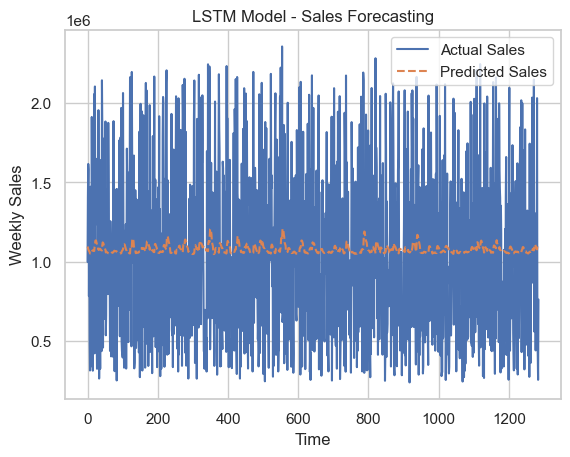

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Reset the index to get 'Date' back as a column
data = data.reset_index()

# Prepare Data
df_lstm = data[['Date', 'Weekly_Sales']].copy()
df_lstm['Date'] = pd.to_datetime(df_lstm['Date'])
df_lstm.set_index('Date', inplace=True)

# Normalize Data
scaler = MinMaxScaler()
df_lstm_scaled = scaler.fit_transform(df_lstm)

# Create Sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(df_lstm_scaled, seq_length)

# Split Data into Train & Test
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile & Train
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predictions & Evaluation
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

mae_lstm = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) for LSTM: {mae_lstm}")

# Plot Results
import matplotlib.pyplot as plt
plt.plot(y_test, label="Actual Sales")
plt.plot(y_pred, label="Predicted Sales", linestyle='dashed')
plt.legend()
plt.title("LSTM Model - Sales Forecasting")
plt.xlabel("Time")
plt.ylabel("Weekly Sales")
plt.show()

In [24]:
!pip install xgboost


You should consider upgrading via the 'D:\Dynamic & Demand\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [25]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Get a list of store columns (Store_1, Store_2, etc.)
store_columns = [col for col in data.columns if col.startswith('Store_')]

# Prepare the data: Select features and target variable
# Include store columns instead of 'Store'
X = data.reset_index()[store_columns + ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = data.reset_index()['Weekly_Sales']  # Reset index for y as well

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for gradient boosting models like XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', n_estimators=1000)

# Fit the model
xgboost_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgboost = xgboost_model.predict(X_test_scaled)

# Evaluate the model
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
print(f"Mean Absolute Error (MAE) for XGBoost: {mae_xgboost}")

Mean Absolute Error (MAE) for XGBoost: 70020.02768162393


In [26]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the model
xgb_model = XGBRegressor()

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

# Fit grid search to data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Hyperparameters: ", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_


Best Hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the model with the best hyperparameters
xgb_model_best = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=300,
    subsample=0.8
)

# Fit the model
xgb_model_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model_best.predict(X_test)

# Evaluate the model using MAE, RMSE, and MAPE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Mean Absolute Error (MAE): 72064.90656128593
Root Mean Squared Error (RMSE): 123655.97412609526
Mean Absolute Percentage Error (MAPE): 6.923466454845766


In [28]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of different combinations to try
    scoring='neg_mean_absolute_error',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

# Train final model with best parameters
best_xgb = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
best_xgb.fit(X_train, y_train)

# Predictions
y_pred = best_xgb.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters:  {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Mean Absolute Error (MAE): 70098.76461198523
Root Mean Squared Error (RMSE): 120263.92972945208
Mean Absolute Percentage Error (MAPE): 6.8692809680788764


In [29]:
!pip install scikit-optimize
!pip install xgboost

You should consider upgrading via the 'D:\Dynamic & Demand\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Dynamic & Demand\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [30]:
import xgboost as xgb
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Prepare data (assuming X_train, X_test, y_train, and y_test are already defined)

# Define the parameter search space for Bayesian optimization
param_space = {
    'max_depth': (3, 15),  # Depth of the tree
    'learning_rate': (0.01, 0.2),  # Step size shrinking
    'n_estimators': (100, 1000),  # Number of boosting rounds
    'subsample': (0.5, 1.0),  # Proportion of samples used for fitting trees
    'colsample_bytree': (0.5, 1.0),  # Proportion of features used for each tree
    'gamma': (0, 5),  # Regularization parameter
    'min_child_weight': (1, 10)  # Minimum sum of instance weight (hessian) needed in a child
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Perform Bayesian Optimization for hyperparameters
opt = BayesSearchCV(xgb_model, param_space, n_iter=20, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the model
opt.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Hyperparameters:", opt.best_params_)

# Use the best model to make predictions
y_pred = opt.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Best Hyperparameters: OrderedDict([('colsample_bytree', 0.6578191435325892), ('gamma', 0), ('learning_rate', 0.03595460466841852), ('max_depth', 11), ('min_child_weight', 2), ('n_estimators', 563), ('subsample', 0.8196635960380304)])
Mean Absolute Error (MAE): 68827.682260101
Root Mean Squared Error (RMSE): 118597.5441935759
Mean Absolute Percentage Error (MAPE): 0.06538713073840494


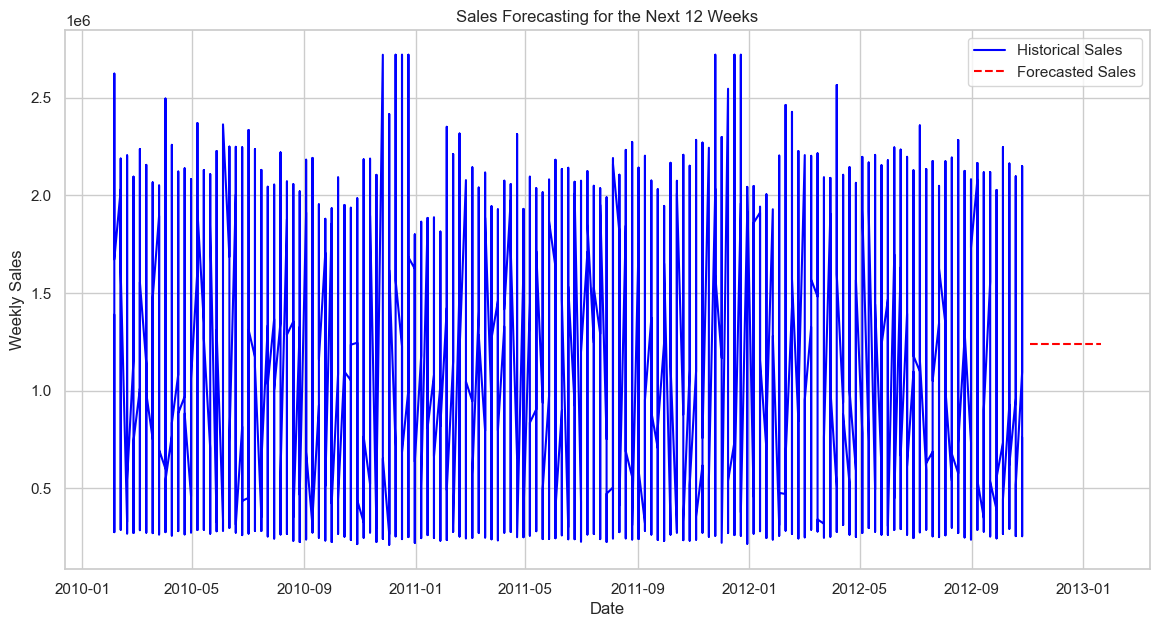

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Assuming you already have a trained XGBoost model (xgb_model)
# Also assuming 'data' is your original dataset with historical sales

# Step 1: Prepare the future data (let's forecast for the next 12 weeks)
# You would need to create future values for the features: 'Fuel_Price', 'CPI', 'Unemployment'

# For the sake of this example, let's assume we forecast these features (you can use previous data, averages, etc.)
future_weeks = 12  # forecasting for 12 weeks ahead
future_dates = pd.date_range(data['Date'].max(), periods=future_weeks+1, freq='W')[1:]

# Get a list of store columns (Store_1, Store_2, etc.)
store_columns = [col for col in data.columns if col.startswith('Store_')]

# Create a dummy future dataframe (make sure to have these columns from your model)
future_data = pd.DataFrame({
    'Date': future_dates,
    'Fuel_Price': np.random.uniform(low=2.5, high=4.5, size=future_weeks),  # Example fuel price
    'CPI': np.random.uniform(low=130, high=220, size=future_weeks),  # Example CPI
    'Unemployment': np.random.uniform(low=3.5, high=10.5, size=future_weeks),  # Example Unemployment rate
    # Add Store columns with some value (e.g., 0) - consider your use case
})
for store_col in store_columns:
    future_data[store_col] = 0  # Or assign appropriate values

# Assuming you also have historical data for features to use as input for predictions
# Select the features for prediction (this would be the same as the features you used during training)
features = store_columns + ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Create missing 'Temperature' with some value (consider your use case)
future_data['Temperature'] = data['Temperature'].mean()  # Or assign appropriate values

# Step 2: Predict future sales using the trained model
future_predictions = opt.predict(future_data[features])

# Step 3: Combine future data and predictions
future_data['Weekly_Sales'] = future_predictions

# Step 4: Plot the actual vs forecasted data
# Assuming 'data' has a 'Weekly_Sales' column and 'Date' column

# Historical data plot
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Weekly_Sales'], label='Historical Sales', color='blue')

# Future data plot
plt.plot(future_data['Date'], future_data['Weekly_Sales'], label='Forecasted Sales', color='red', linestyle='--')

# Adding labels and title
plt.title('Sales Forecasting for the Next 12 Weeks')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()

# Show plot
plt.show()

In [32]:
# Assuming 'Fuel_Price' is the price variable and 'y_pred' is the predicted demand

# Step 1: Calculate percentage change in price
data['fuel_price_pct_change'] = data['Fuel_Price'].pct_change()

# Step 2: Calculate percentage change in demand (weekly sales or y_pred)
demand_pct_change = (y_pred - y_test.values) / y_test.values  # Percentage change in demand

# Step 3: Drop NaN values for both price and demand changes
valid_data = data[['fuel_price_pct_change']].dropna()  # Drop NaN values from fuel price change

# Align demand_pct_change with valid_data using the index of y_test
demand_pct_change = pd.Series(demand_pct_change, index=y_test.index)
demand_pct_change = demand_pct_change[valid_data.index.intersection(demand_pct_change.index)]

# Step 4: Calculate the price elasticity of demand
elasticity = demand_pct_change / valid_data['fuel_price_pct_change'].loc[demand_pct_change.index]  # Align using .loc

# Step 5: Calculate average elasticity
mean_elasticity = elasticity.mean()

# Print the results
print(f"Average Price Elasticity of Demand: {mean_elasticity}")

Average Price Elasticity of Demand: nan


d:\Dynamic & Demand\myenv\lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [33]:
import numpy as np

# Step 1: Calculate percentage change in price and demand

# Make sure 'Fuel_Price' has no NaN or zero values before pct_change
data['fuel_price_pct_change'] = data['Fuel_Price'].pct_change()

# Remove any rows with NaN values in 'fuel_price_pct_change'
data.dropna(subset=['fuel_price_pct_change'], inplace=True)

# Calculate percentage change in demand
demand_pct_change = (y_pred - y_test) / y_test  # Percentage change in demand

# Ensure demand_pct_change has the same index as y_test
demand_pct_change = pd.Series(demand_pct_change, index=y_test.index)

# Align data using the index of demand_pct_change (which is aligned with y_test)
valid_data = data[['fuel_price_pct_change']].loc[demand_pct_change.index]  # Align using .loc

# Handle zero values in 'fuel_price_pct_change' and 'demand_pct_change' (avoid division errors)
valid_data = valid_data[valid_data['fuel_price_pct_change'] != 0]
demand_pct_change = demand_pct_change[valid_data.index]

# Step 2: Calculate the price elasticity of demand
elasticity = demand_pct_change / valid_data['fuel_price_pct_change']

# Step 3: Calculate average elasticity
mean_elasticity = elasticity.mean()

# Print the results
print(f"Average Price Elasticity of Demand: {mean_elasticity}")

Average Price Elasticity of Demand: -0.08888228334560148


In [34]:
import numpy as np
import random

# Simulated Environment: For simplicity, we assume price elasticity and demand are linear
class PricingEnv:
    def __init__(self, base_demand=1000, price_elasticity=-0.5, price_range=(50, 200)):
        self.base_demand = base_demand  # base demand when price is at the minimum price
        self.price_elasticity = price_elasticity  # price elasticity (negative slope)
        self.price_range = price_range  # price range (min, max)
        self.current_price = random.randint(price_range[0], price_range[1])  # random starting price

    def reset(self):
        # Reset price to a random value
        self.current_price = random.randint(self.price_range[0], self.price_range[1])
        return self.current_price

    def step(self, action):
        # Simulate price change
        new_price = self.current_price + action
        # Ensure price stays within the allowed range
        new_price = np.clip(new_price, self.price_range[0], self.price_range[1])

        # Calculate demand based on price elasticity (simple linear demand model)
        demand = self.base_demand * (1 + self.price_elasticity * (new_price - self.price_range[0]) / (self.price_range[1] - self.price_range[0]))

        # Calculate reward as revenue: Price * Demand
        reward = new_price * demand
        self.current_price = new_price

        return new_price, reward

# Q-Learning Agent Class
class QLearningAgent:
    def __init__(self, action_space, epsilon=0.1, learning_rate=0.1, discount_factor=0.99):
        self.action_space = action_space
        self.epsilon = epsilon  # Exploration factor
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.q_table = {}  # A table to store Q-values for each state-action pair

    def get_state(self, price):
        # The state is just the price, but we can extend this with more features if needed
        return price

    def choose_action(self, state):
        # Epsilon-Greedy: Exploration vs Exploitation
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.action_space)  # Explore: pick a random action
        else:
            # Exploit: choose the action with the highest Q-value
            q_values = [self.q_table.get((state, action), 0) for action in self.action_space]
            max_q_value = max(q_values)
            best_actions = [action for action, q_value in zip(self.action_space, q_values) if q_value == max_q_value]
            return random.choice(best_actions)  # Break ties by picking a random action

    def learn(self, state, action, reward, next_state):
        # Q-Learning update rule
        best_next_q = max([self.q_table.get((next_state, a), 0) for a in self.action_space], default=0)
        current_q = self.q_table.get((state, action), 0)

        # Q-value update
        new_q = current_q + self.learning_rate * (reward + self.discount_factor * best_next_q - current_q)
        self.q_table[(state, action)] = new_q

# Hyperparameters
price_range = (50, 200)  # Prices between 50 and 200
action_space = [-5, 5]  # Price can be adjusted by -5 or +5 units (increase or decrease)

# Initialize environment and agent
env = PricingEnv(price_range=price_range)
agent = QLearningAgent(action_space=action_space, epsilon=0.1, learning_rate=0.1, discount_factor=0.99)

# Training the Q-learning Agent
n_episodes = 1000  # Number of episodes to train the model

for episode in range(n_episodes):
    state = env.reset()  # Reset environment to a random starting price
    total_reward = 0

    for _ in range(100):  # Simulate 100 time steps in each episode
        action = agent.choose_action(state)  # Choose an action (price adjustment)
        next_state, reward = env.step(action)  # Get next state and reward from environment
        agent.learn(state, action, reward, next_state)  # Learn from the experience

        total_reward += reward
        state = next_state  # Update the state

    if episode % 100 == 0:  # Print progress every 100 episodes
        print(f"Episode {episode}/{n_episodes}, Total Reward: {total_reward}")

# Test the learned policy
test_price = 100  # Starting price for testing
for step in range(10):
    action = agent.choose_action(test_price)
    new_price, reward = env.step(action)
    print(f"Step {step+1}, Price: {new_price}, Reward: {reward}")
    test_price = new_price


Episode 0/1000, Total Reward: 9879366.666666668
Episode 100/1000, Total Reward: 5793750.0
Episode 200/1000, Total Reward: 7632966.666666666
Episode 300/1000, Total Reward: 8042566.666666664
Episode 400/1000, Total Reward: 10023726.666666668
Episode 500/1000, Total Reward: 9526966.666666664
Episode 600/1000, Total Reward: 10018500.0
Episode 700/1000, Total Reward: 8441166.66666666
Episode 800/1000, Total Reward: 10178900.0
Episode 900/1000, Total Reward: 10122750.0
Step 1, Price: 140, Reward: 98000.0
Step 2, Price: 135, Reward: 96750.0
Step 3, Price: 130, Reward: 95333.33333333334
Step 4, Price: 135, Reward: 96750.0
Step 5, Price: 130, Reward: 95333.33333333334
Step 6, Price: 135, Reward: 96750.0
Step 7, Price: 130, Reward: 95333.33333333334
Step 8, Price: 135, Reward: 96750.0
Step 9, Price: 130, Reward: 95333.33333333334
Step 10, Price: 135, Reward: 96750.0


Episode 0/1000, Total Reward: 10046816.666666666
Episode 100/1000, Total Reward: 10176766.666666668
Episode 200/1000, Total Reward: 10092900.0
Episode 300/1000, Total Reward: 9931966.666666666
Episode 400/1000, Total Reward: 8446499.999999994
Episode 500/1000, Total Reward: 9922633.333333332
Episode 600/1000, Total Reward: 9603166.666666664
Episode 700/1000, Total Reward: 8411166.66666666
Episode 800/1000, Total Reward: 10152500.0
Episode 900/1000, Total Reward: 8443166.66666666


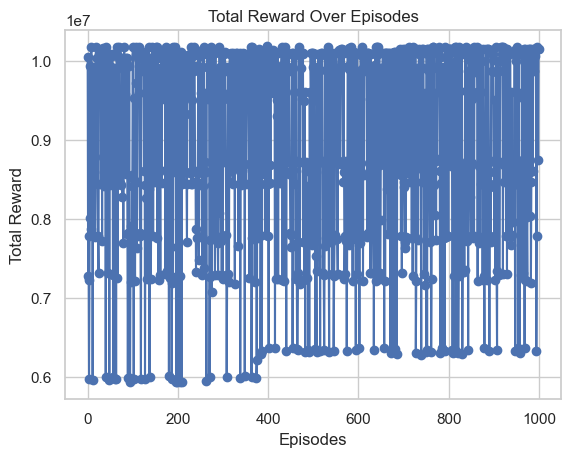

In [35]:
import matplotlib.pyplot as plt

# Plotting total reward over episodes
episode_numbers = list(range(0, n_episodes, 100))  # Every 100th episode

# Ensure total_rewards is collected during training
total_rewards = []  # Initialize an empty list to store total rewards

# ... (Your Q-learning training loop) ...
for episode in range(n_episodes):
    state = env.reset()  # Reset environment to a random starting price
    total_reward = 0

    for _ in range(100):  # Simulate 100 time steps in each episode
        action = agent.choose_action(state)  # Choose an action (price adjustment)
        next_state, reward = env.step(action)  # Get next state and reward from environment
        agent.learn(state, action, reward, next_state)  # Learn from the experience

        total_reward += reward
        state = next_state  # Update the state

    # Append total_reward to the list after each episode (corrected indentation)
    total_rewards.append(total_reward) # <--- This line was potentially misplaced or missing

    if episode % 100 == 0:  # Print progress every 100 episodes
        print(f"Episode {episode}/{n_episodes}, Total Reward: {total_reward}")

# ... (Rest of your code) ...

# Plotting: Now, episode_numbers and total_rewards should have the same length
# Adjust plotting to reflect all episodes
plt.plot(range(n_episodes), total_rewards, marker='o') # <--- Change this line to use range(n_episodes) for the x-axis
plt.title('Total Reward Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

# ... (Rest of your plotting code) ...

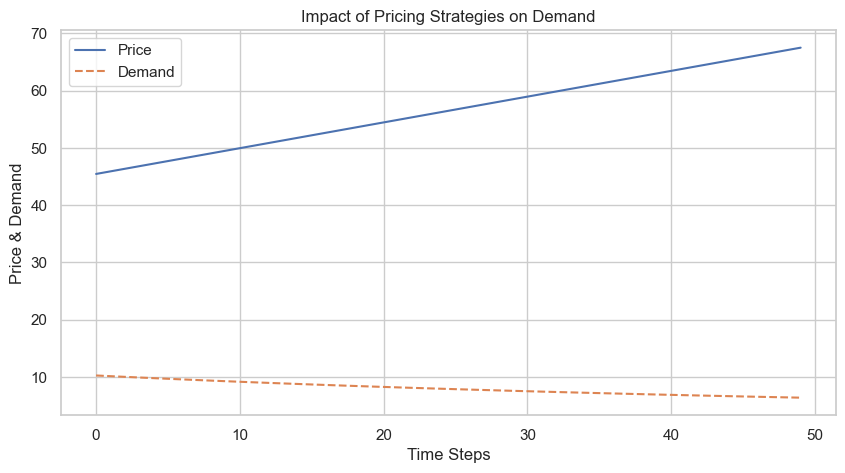

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define demand function (simplified for example)
def demand_function(price, base_demand=1000, elasticity=-1.2):
    return base_demand * (price ** elasticity)

# Define pricing strategies
def surge_pricing(price, demand, threshold=800):
    """ Increase price if demand is above a threshold """
    return price * 1.2 if demand > threshold else price

def penetration_pricing(price, initial_low_price=50, time_step=10):
    """ Start with low price, gradually increase over time """
    return initial_low_price + (price - initial_low_price) * (time_step / 100)

def competitive_pricing(price, competitor_price):
    """ Adjust price based on competitor price """
    return competitor_price * 0.95 if price > competitor_price else price

def discount_pricing(price, seasonality_factor=0.9):
    """ Offer discounts during low seasons """
    return price * seasonality_factor

# Simulating pricing strategies
base_price = 100
competitor_price = 90

prices = []
demands = []

for t in range(1, 51):
    price = base_price

    # Apply strategies
    demand = demand_function(price)
    price = surge_pricing(price, demand)
    price = penetration_pricing(price, time_step=t)
    price = competitive_pricing(price, competitor_price)
    price = discount_pricing(price)

    prices.append(price)
    demands.append(demand_function(price))

# Plot results
plt.figure(figsize=(10,5))
plt.plot(prices, label='Price')
plt.plot(demands, label='Demand', linestyle='dashed')
plt.xlabel("Time Steps")
plt.ylabel("Price & Demand")
plt.legend()
plt.title("Impact of Pricing Strategies on Demand")
plt.show()


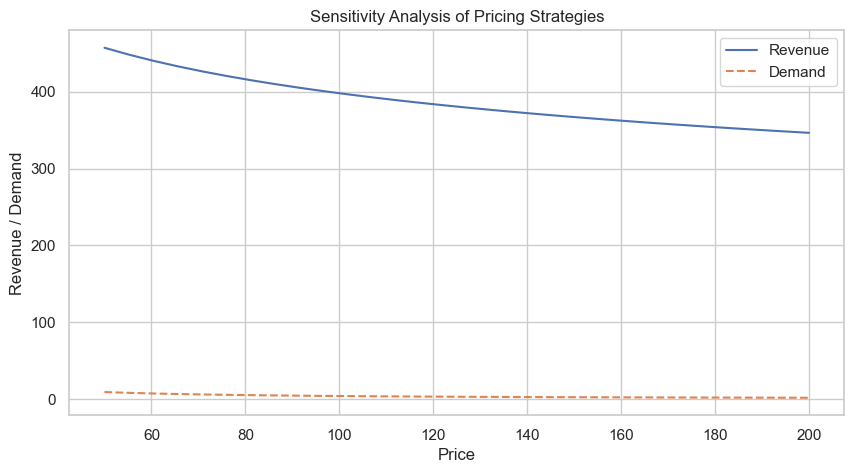

In [37]:
import seaborn as sns
import pandas as pd

# Generate price range and corresponding demand
price_range = np.linspace(50, 200, 30)
demand_values = [demand_function(p) for p in price_range]
revenue_values = [p * demand_function(p) for p in price_range]

# Create DataFrame
df = pd.DataFrame({"Price": price_range, "Demand": demand_values, "Revenue": revenue_values})

# Plot revenue vs price
plt.figure(figsize=(10,5))
sns.lineplot(x="Price", y="Revenue", data=df, label="Revenue")
sns.lineplot(x="Price", y="Demand", data=df, label="Demand", linestyle="dashed")
plt.title("Sensitivity Analysis of Pricing Strategies")
plt.xlabel("Price")
plt.ylabel("Revenue / Demand")
plt.legend()
plt.show()


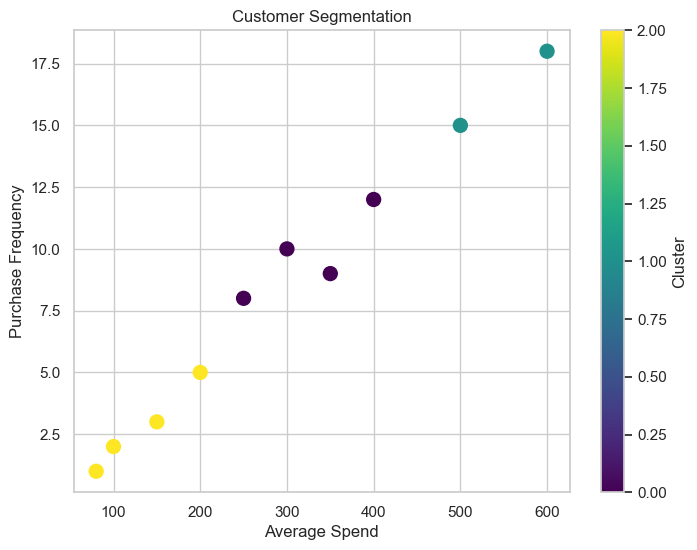

In [38]:
from sklearn.cluster import KMeans

# Simulated customer data: [average spend, frequency of purchases]
customer_data = np.array([
    [200, 5], [250, 8], [150, 3], [300, 10], [400, 12],
    [100, 2], [80, 1], [500, 15], [600, 18], [350, 9]
])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data_clusters = kmeans.fit_predict(customer_data)

# Plot segmentation
plt.figure(figsize=(8,6))
plt.scatter(customer_data[:,0], customer_data[:,1], c=customer_data_clusters, cmap='viridis', s=100)
plt.xlabel("Average Spend")
plt.ylabel("Purchase Frequency")
plt.title("Customer Segmentation")
plt.colorbar(label="Cluster")
plt.show()


In [49]:
import numpy as np
import pandas as pd

# Simulated sample data for A/B testing
np.random.seed(42)

# Generate random revenue data for two groups (A and B)
group_a_revenue = np.random.normal(loc=1500, scale=200, size=100)  # Surge Pricing (mean=1500, std=200)
group_b_revenue = np.random.normal(loc=1300, scale=250, size=100)  # Penetration Pricing (mean=1300, std=250)

# Convert to DataFrame for easy handling
df = pd.DataFrame({
    'Group': ['A'] * len(group_a_revenue) + ['B'] * len(group_b_revenue),
    'Revenue': np.concatenate([group_a_revenue, group_b_revenue])
})



In [51]:
from scipy import stats

# Perform T-test (independent samples)
t_stat, p_value = stats.ttest_ind(group_a_revenue, group_b_revenue)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results based on the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference between A and B is statistically significant!")
else:
    print("No significant difference between A and B.")



T-statistic: 5.793844304212399
P-value: 2.6730471948729218e-08
The difference between A and B is statistically significant!


In [52]:
import scipy.stats as stats

def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)
    margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - margin_of_error, mean + margin_of_error

# Calculate confidence intervals for both groups
conf_interval_a = confidence_interval(group_a_revenue)
conf_interval_b = confidence_interval(group_b_revenue)

print(f"Group A Confidence Interval: {conf_interval_a}")
print(f"Group B Confidence Interval: {conf_interval_b}")


Group A Confidence Interval: (np.float64(1443.1906327276201), np.float64(1515.2707603147428))
Group B Confidence Interval: (np.float64(1258.268993541774), np.float64(1352.8832999831877))


In [53]:
def cohen_d(group1, group2):
    diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1) ** 2 + np.std(group2) ** 2) / 2)
    return diff / pooled_std

# Calculate Cohen's d (Effect Size)
effect_size = cohen_d(group_a_revenue, group_b_revenue)
print(f"Cohen's d (Effect Size): {effect_size}")



Cohen's d (Effect Size): 0.8235011707406379


C:\Users\surya\AppData\Local\Temp\ipykernel_6700\3172270423.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Group', y='Revenue', data=df, estimator=np.mean, ci="sd", palette="Set2")
C:\Users\surya\AppData\Local\Temp\ipykernel_6700\3172270423.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Revenue', data=df, estimator=np.mean, ci="sd", palette="Set2")


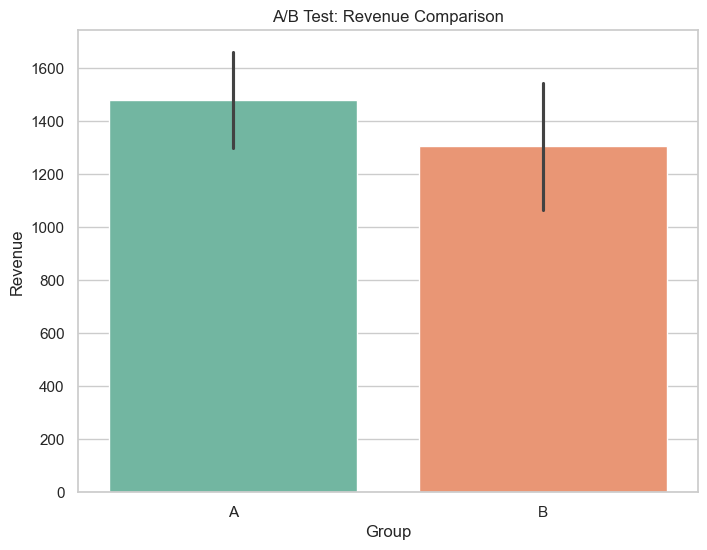

C:\Users\surya\AppData\Local\Temp\ipykernel_6700\3172270423.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Revenue', data=df, palette="Set2")


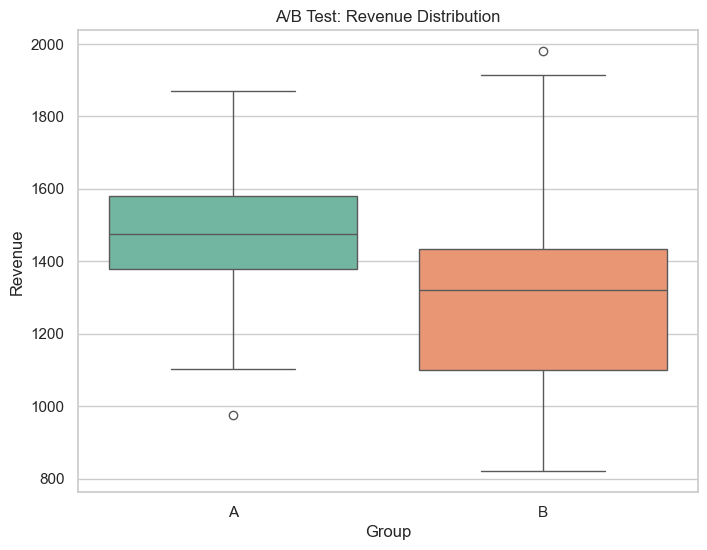

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Group': ['A'] * len(group_a_revenue) + ['B'] * len(group_b_revenue),
    'Revenue': np.concatenate([group_a_revenue, group_b_revenue])
})

# Set plot style
sns.set(style="whitegrid")

# Create barplot to show the mean revenue comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Revenue', data=df, estimator=np.mean, ci="sd", palette="Set2")
plt.title('A/B Test: Revenue Comparison')
plt.show()

# Create boxplot to show the distribution of revenues
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Revenue', data=df, palette="Set2")
plt.title('A/B Test: Revenue Distribution')
plt.show()

